<a target="_blank" href="https://colab.research.google.com/drive/1CPftjxShVV7NcA6msWlrY6QkqG0skSxR?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🧱 Generate RDF files following the BrickSchema ontology using LLMs

<p align="center">
  <img src="https://raw.githubusercontent.com/EURAC-EEBgroup/brick-llm/refs/heads/main/docs/assets/brickllm_banner.png" alt="BrickLLM" style="width: 100%;">
</p>

### 🔧 Install `dependencies`

In [1]:
%%capture
!pip install brickllm

### 🔑 Import `OpenAI` API key

In [2]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API key:\n")

OpenAI API key:
··········


### 🚀 Initialize `BrickSchemaGraph`, define your `building description` and generate the `TTL`

In [5]:
from brickllm.graphs import BrickSchemaGraph

# Create an instance of BrickSchemaGraph with a predefined provider
brick_graph = BrickSchemaGraph(model="openai")

Let's visualize the graph

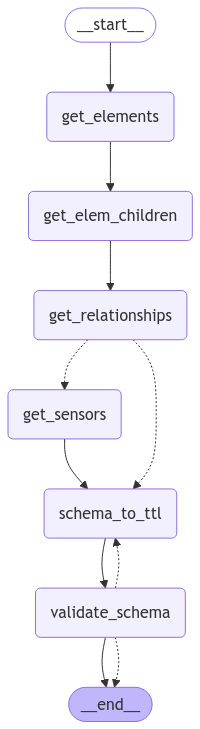

In [6]:
from IPython.display import Image

# Display the graph structure
brick_graph.display(filename="graph_openai.png")

# Display the PNG image in the notebook
display(Image(filename="graph_openai.png"))

We define the building description and run the graph

In [7]:
# Specify the user prompt
building_description = """
I have a building located in Bolzano.
It has 3 floors and each floor has 1 office.
There are 2 rooms in each office and each room has three sensors:
- Temperature sensor;
- Humidity sensor;
- CO2 sensor.
"""

# Prepare input data
input_data = {"user_prompt": building_description}

# Run the graph
result = brick_graph.run(input_data=input_data, stream=False)

2025-01-02 23:42:50,829 - BrickLLM - EURAC - 🔍 Getting elements from user prompt
EURAC:BrickLLM:🔍 Getting elements from user prompt
2025-01-02 23:42:51,788 - BrickLLM - EURAC - 📊 Getting children for each BrickSchema category in the element list
EURAC:BrickLLM:📊 Getting children for each BrickSchema category in the element list
2025-01-02 23:42:53,493 - BrickLLM - EURAC - 🔗 Getting relationships between building components
EURAC:BrickLLM:🔗 Getting relationships between building components
2025-01-02 23:42:58,172 - BrickLLM - EURAC - 📡 Checking for sensor presence
EURAC:BrickLLM:📡 Checking for sensor presence
2025-01-02 23:42:58,180 - BrickLLM - EURAC - 📝 Generating TTL from schema
EURAC:BrickLLM:📝 Generating TTL from schema
2025-01-02 23:43:12,883 - BrickLLM - EURAC - ✅ Validating TTL schema
EURAC:BrickLLM:✅ Validating TTL schema


Print the state of the graph execution

In [11]:
import json
print(json.dumps(result, indent=2))

{
  "user_prompt": "\nI have a building located in Bolzano.\nIt has 3 floors and each floor has 1 office.\nThere are 2 rooms in each office and each room has three sensors:\n- Temperature sensor;\n- Humidity sensor;\n- CO2 sensor.\n",
  "elem_list": [
    "Building",
    "Floor",
    "Space",
    "Sensor"
  ],
  "elem_hierarchy": {
    "Location": {
      "Floor": {
        "properties": {}
      },
      "Space": {
        "Room": {
          "Office": {
            "properties": {}
          }
        }
      },
      "Building": {
        "properties": {}
      }
    },
    "Point": {
      "Sensor": {
        "Air_Quality_Sensor": {
          "CO2_Sensor": {
            "properties": {
              "isPointOf": {
                "constraint": [
                  "Location",
                  "Equipment"
                ]
              }
            }
          }
        },
        "Humidity_Sensor": {
          "properties": {
            "isPointOf": {
              "constraint":

### 💾 Save generated `TTL` locally and generate `summary` + `keywords` (BONUS)

In [12]:
# save the result to a file
brick_graph.save_ttl_output("my_building.ttl")

In [13]:
# Generate the building description from the generated ttl file
building_description, key_elements = brick_graph.ttl_to_building_description()

print("Generated building description:")
print(building_description)
print("--------------------------------")
print("Generated key elements:")
print(key_elements)

Generated building description:
The Bolzano Building is a multi-story facility located in Bolzano. It consists of three floors, each containing an office. Floor 1 includes Office 1_1, Floor 2 includes Office 1_2, and Floor 3 includes Office 1_3. Each office is further divided into two rooms. Office 1_1 contains Room 1_1_1 and Room 1_1_2, Office 1_2 contains Room 2_1_1 and Room 2_1_2, and Office 1_3 contains Room 3_1_1 and Room 3_1_2. Each room is equipped with a set of sensors: a Temperature Sensor, a Humidity Sensor, and a CO2 Sensor. These sensors are used to monitor the environmental conditions within each room.
--------------------------------
Generated key elements:
['Building: Bolzano Building', 'Location: Bolzano', 'Floors: 3 (Floor 1, Floor 2, Floor 3)', 'Offices: 3 (Office 1_1, Office 1_2, Office 1_3)', 'Rooms: 6 (Room 1_1_1, Room 1_1_2, Room 2_1_1, Room 2_1_2, Room 3_1_1, Room 3_1_2)', 'Sensors: Temperature Sensor, Humidity Sensor, CO2 Sensor in each room']


## 🔗 Resources


- 🐙 **GitHub:** [BrickLLM](https://github.com/EURAC-EEBgroup/brick-llm)  
- 💼 **GitHub:** [BrickLLM App](https://github.com/EURAC-EEBgroup/BrickLLM-App)  
- 🐦 **Documentation:** [here](https://eurac-eebgroup.github.io/brick-llm/)
